In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import viz
from greedyPolicy import GreedyPolicy


COLORS, PAGE_WIDTH, ROW_HEIGHT = viz.set_plots()

In [8]:
prices = pd.read_csv("../data/prices.csv", index_col=0, parse_dates=True)
prices2023 = prices.loc[
        f"2023-01-01" :f"2023-01-31"
    ].lmp

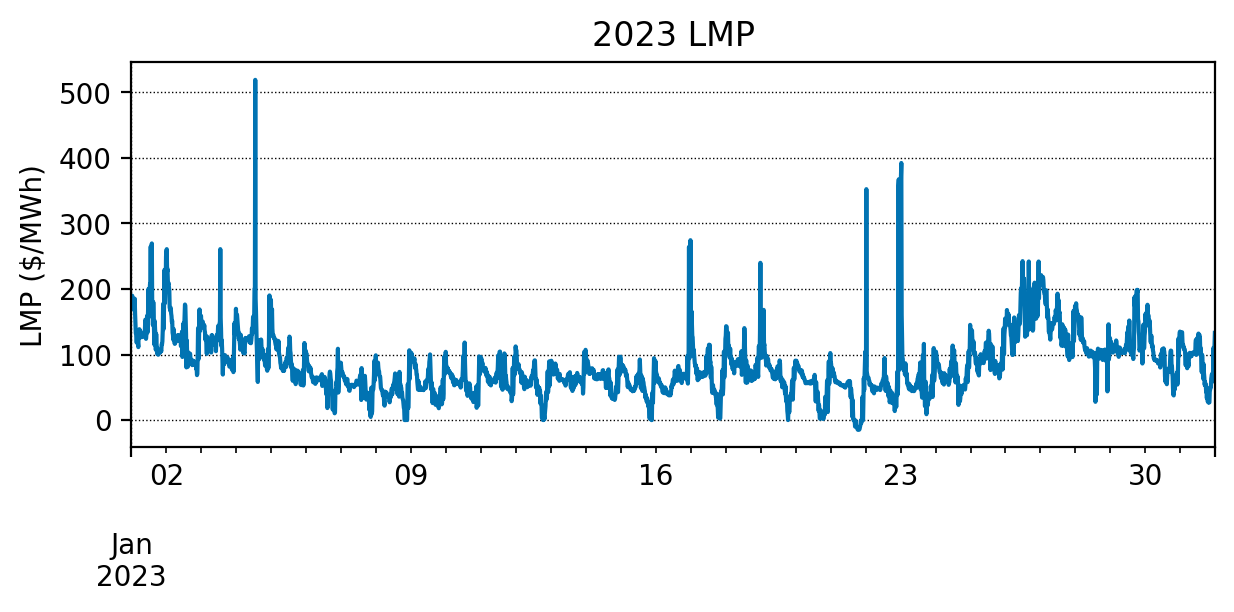

In [9]:
f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
prices2023.plot(ax=ax)
ax.set_title("2023 LMP")
ax.set_ylabel("LMP ($/MWh)")
plt.show()

In [17]:
# Run the greedy algorithm:
from tqdm import tqdm
MonthlyRewards = []
Max_Power = []
for _ in tqdm(range(100)):
    prices = prices2023.copy()
    prices = pd.concat([prices[-4:], prices])
    greedy = GreedyPolicy(prices2023)
    greedy.run()
    MonthlyRewards.append(round(greedy.station.history.reward.sum()/1e3,2))
    Max_Power.append(greedy.station.history.load.max())

print("Reward Metrics: ", np.mean(MonthlyRewards), "$")
print("Max Power Metrics: ", np.mean(Max_Power), "MW")

100%|██████████| 100/100 [06:14<00:00,  3.74s/it]

Reward Metrics:  10.973500000000003 $
Max Power Metrics:  0.534236636450757 MW


In [14]:
print("Total Benefits:", round(np.mean(MonthlyRewards),2), "k$")

Total Benefits: 10.79 k$


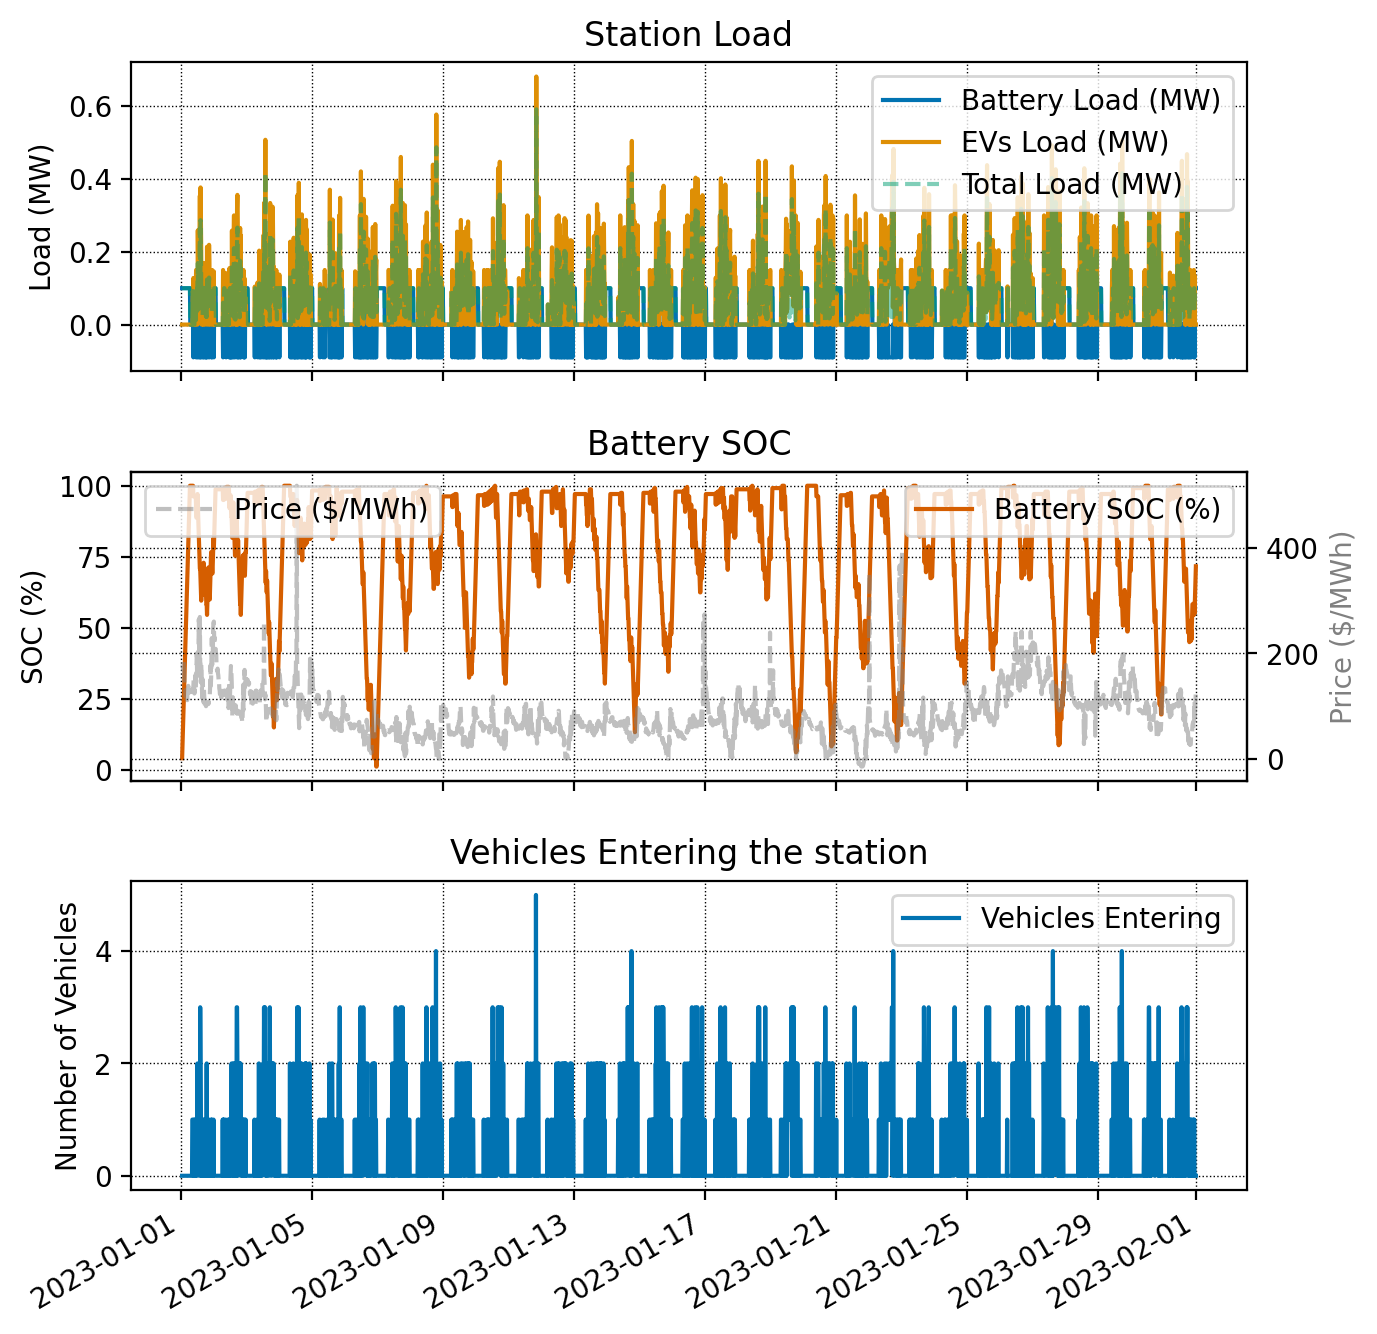

In [15]:
START, END = "2023-01-01", "2023-01-31"

viz.plotOperations(greedy.station.history, START, END, save_path="GreedyResults/greedy_policy.png")

In [11]:
greedy.station.history.load.max()

0.5401023154992194